In [2]:
!pip install prophet

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [4]:
file_path = "/content/drive/MyDrive/Ali_Baba_Stock_Data.csv"
df = pd.read_csv(file_path)


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [7]:
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm5njeraq/dhnv3z9l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm5njeraq/foe4ylwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92742', 'data', 'file=/tmp/tmpm5njeraq/dhnv3z9l.json', 'init=/tmp/tmpm5njeraq/foe4ylwp.json', 'output', 'file=/tmp/tmpm5njeraq/prophet_modelwpzalctw/prophet_model-20250314165833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:58:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:58:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

<Figure size 1200x600 with 0 Axes>

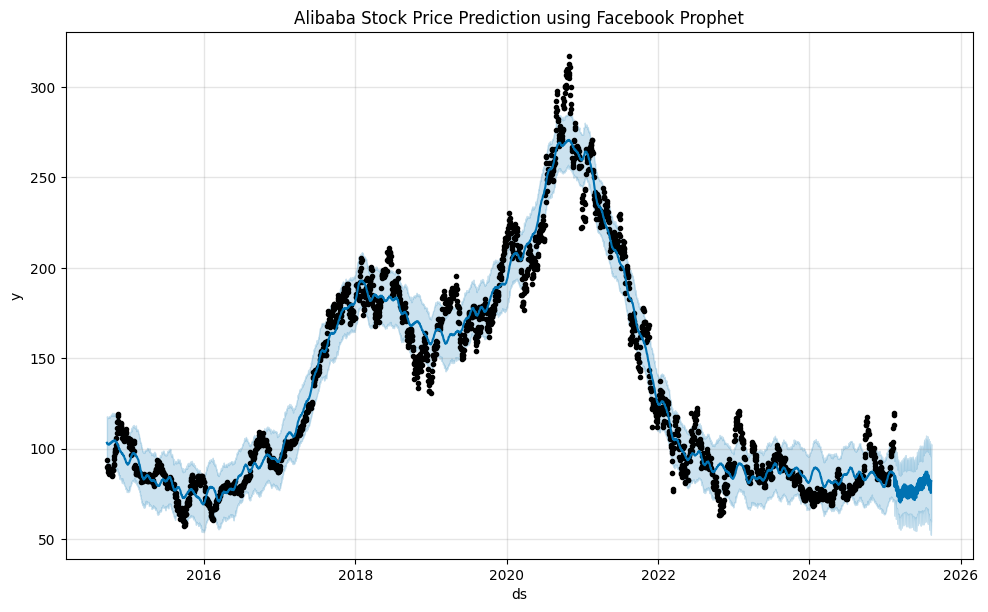

In [9]:
plt.figure(figsize=(12, 6))
model.plot(forecast)
plt.title("Alibaba Stock Price Prediction using Facebook Prophet")
plt.show()


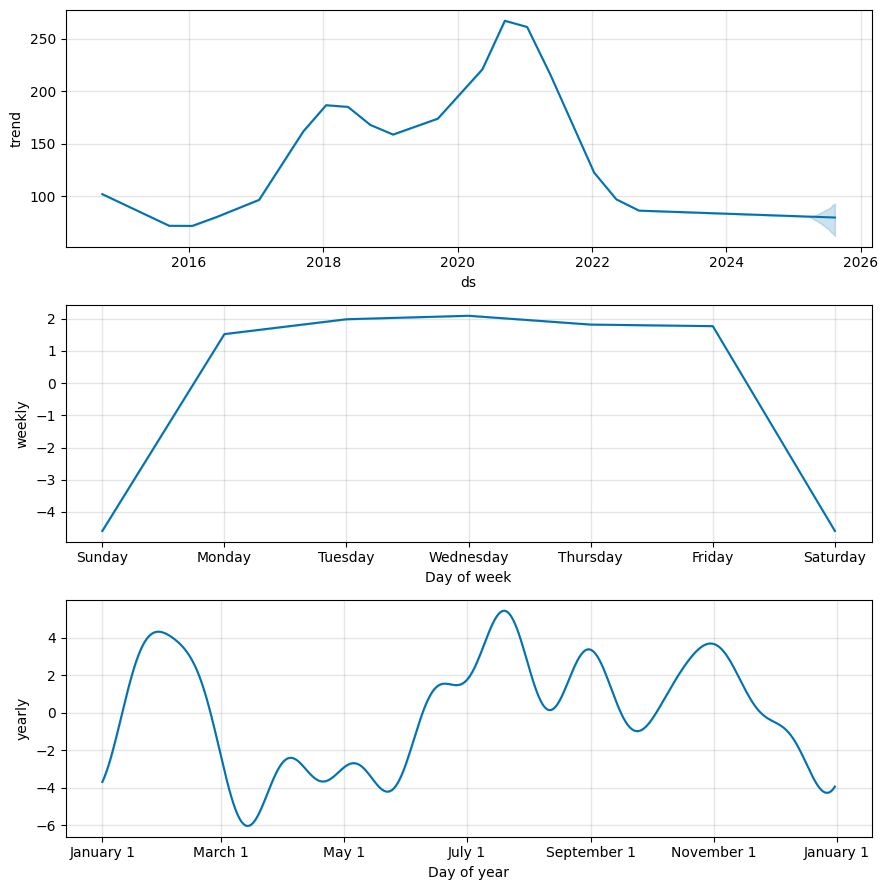

In [10]:
model.plot_components(forecast)
plt.show()

In [11]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds       yhat  yhat_lower  yhat_upper
2792 2025-08-08  81.974444   59.023130  100.866032
2793 2025-08-09  75.471364   52.872809   95.723151
2794 2025-08-10  75.375476   52.282549   95.929720
2795 2025-08-11  81.440451   59.221706  101.828805
2796 2025-08-12  81.901678   59.675739  102.437580


In [12]:
latest_prediction = forecast.iloc[-1]
investment_decision = "BUY" if latest_prediction['yhat'] > df['Close'].iloc[-1] else "HOLD or SELL"
print(f"Investment Advice: {investment_decision}")
print("If the forecasted price is higher than the current price, it might be a good time to invest.")

Investment Advice: HOLD or SELL
If the forecasted price is higher than the current price, it might be a good time to invest.
